In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

data = pd.read_csv("data.csv")
# data = pd.read_excel("data.xls")
data.head()


,Unnamed: 0,Unnamed: 0.1,site_id,space_total,space_occupied,space_vacant,long,lati,address,Cluster
0,0,0,0,37,0,37,121.53044,25.01493,汀洲路三段60巷2弄路側(A舍北側),0
1,1,1,1,32,0,32,121.52917,25.01466,水源舍區C南側,0
2,2,2,2,18,0,18,121.52997,25.01411,思源街16號之1旁,0
3,3,3,3,10,1,9,121.52895,25.01391,檔案展示館東北側,0
4,4,4,4,30,7,23,121.53009,25.01525,汀洲路三段60巷2弄路側(B舍北側),0


In [31]:
df = data[["long", "lati"]]
df.head()

,long,lati
0,121.53044,25.01493
1,121.52917,25.01466
2,121.52997,25.01411
3,121.52895,25.01391
4,121.53009,25.01525


In [32]:
temp_df = pd.DataFrame()

for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df)
    # 將分組資料 (分類標籤) 併入原資料
    lb = pd.DataFrame(labels, columns=['labels%s'%i])
    temp_df = pd.concat((temp_df,lb), axis=1)

# df = pd.concat((data["site_id"], df), axis=1)

df.head()
temp_df
output = pd.concat((data, temp_df), axis=1)
output.head()

,Unnamed: 0,Unnamed: 0.1,site_id,space_total,space_occupied,space_vacant,long,lati,address,Cluster,labels1,labels2,labels3,labels4,labels5,labels6
0,0,0,0,37,0,37,121.53044,25.01493,汀洲路三段60巷2弄路側(A舍北側),0,0,1,2,2,3,2
1,1,1,1,32,0,32,121.52917,25.01466,水源舍區C南側,0,0,1,2,2,3,2
2,2,2,2,18,0,18,121.52997,25.01411,思源街16號之1旁,0,0,1,2,2,3,2
3,3,3,3,10,1,9,121.52895,25.01391,檔案展示館東北側,0,0,1,2,2,3,2
4,4,4,4,30,7,23,121.53009,25.01525,汀洲路三段60巷2弄路側(B舍北側),0,0,1,2,2,3,2


In [25]:
output.to_csv("data_after_cluster.csv")

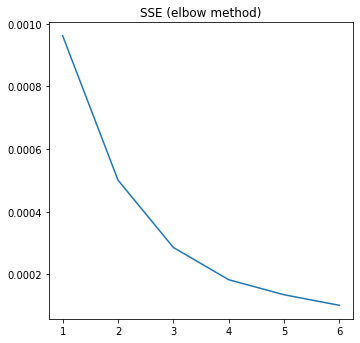

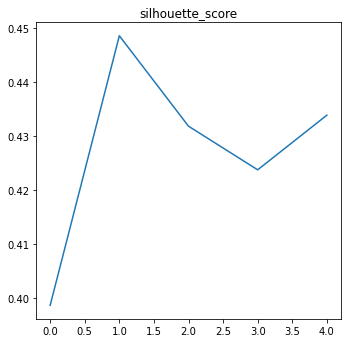

In [10]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(df) for k in range(1, 7)]
inertias = [model.inertia_ for model in kmeans_list]
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('SSE (elbow method)')
plt.plot(range(1,7), inertias)
# plt.plot(selected_K, distortions[selected_K - 2], 'go') # 最佳解
plt.show()

silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_list[1:]]
plt.figure(figsize=(12, 12))
plt.subplot(222)
plt.title('silhouette_score')
plt.plot(silhouette_scores)
# plt.plot(selected_K, distortions[selected_K - 2], 'go') # 最佳解
plt.show()